In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Dataset and Importing Required Libraries

In [ ]:
# Libraries Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dataset Load karna (Aapka path yahan aayega)
df = pd.read_csv("/content/drive/MyDrive/CodeAlpha_DataScience/Task1_Iris_Classification/Iris.csv")
print("Dataset Successfully Loaded!")
df.head()

Dataset Successfully Loaded!


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis (EDA)

In [ ]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()


Dataset Shape: (150, 6)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# 1. Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


# Data Visualization

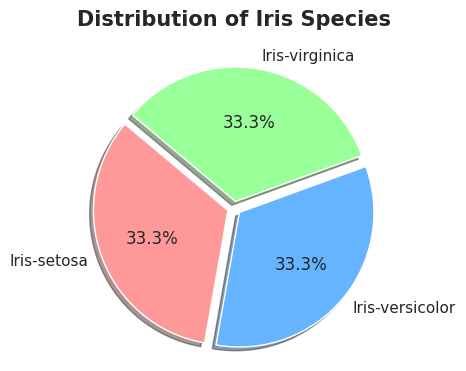

In [ ]:
#  Species Distribution (Pie Chart)
plt.figure(figsize=(5, 4))
sns.set_theme(style="whitegrid")

# Data preparation for pie chart
species_counts = df['Species'].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99'] # Soft professional colors

plt.pie(species_counts,
        labels=species_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        shadow=True,
        explode=(0.05, 0.05, 0.05)) # Slice ko thoda bahar nikalne ke liye

plt.title('Distribution of Iris Species', fontsize=15, fontweight='bold', pad=20)
plt.axis('equal') # Pie chart ko circle rakhne ke liye
plt.show()

# Relationship Analysis

Generating Relationship Map... Please wait.


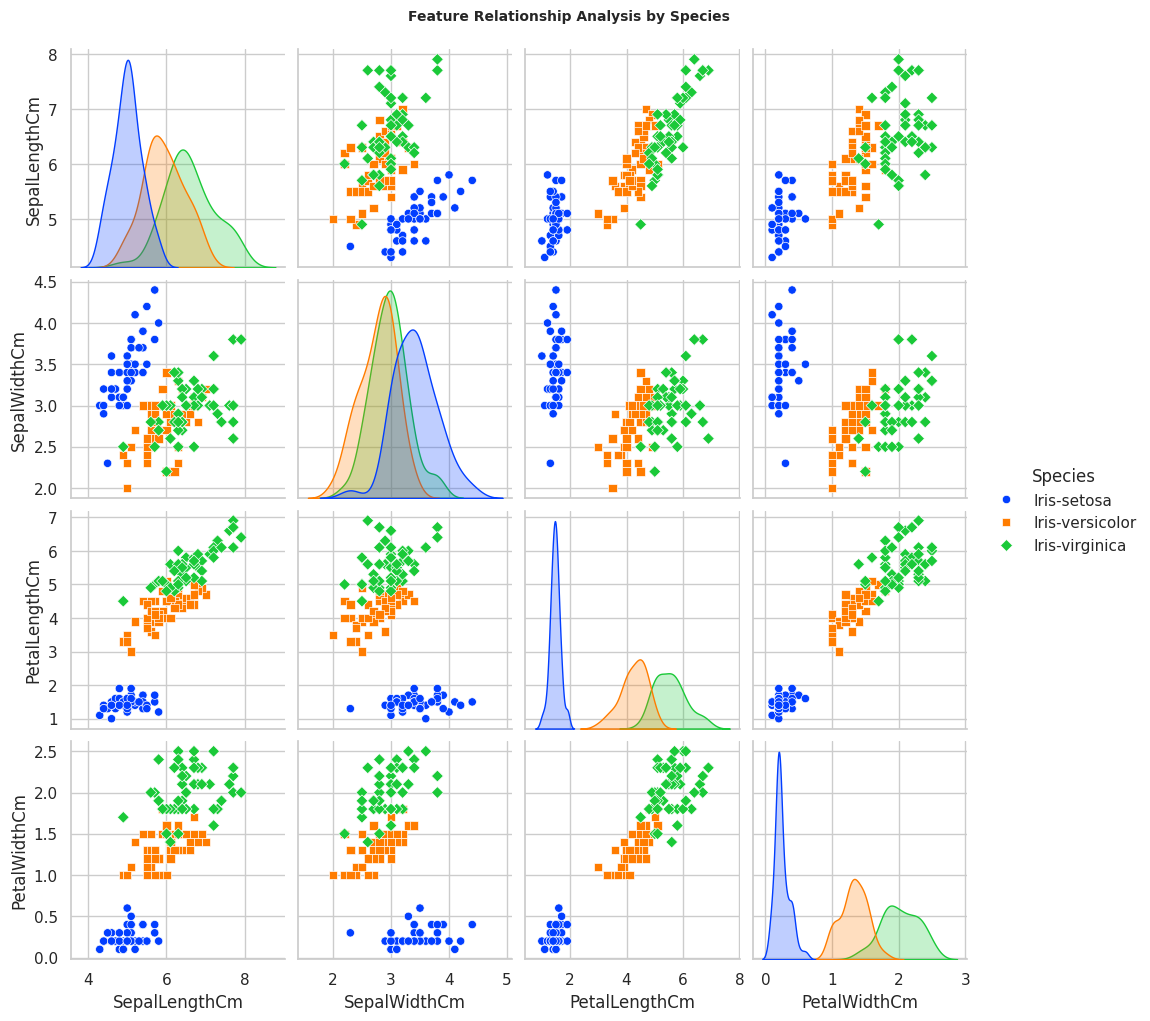

In [ ]:
# Pairplot - Feature Relationships
print("Generating Relationship Map... Please wait.")

# Plotting Pairplot (Id column ko drop kar ke)
pair_plot = sns.pairplot(df.drop('Id', axis=1),
                         hue='Species',
                         palette='bright',
                         diag_kind='kde',
                         markers=["o", "s", "D"])

# Adjusting title and layout
pair_plot.fig.suptitle("Feature Relationship Analysis by Species", y=1.02, fontsize=10, fontweight='bold')
plt.show()

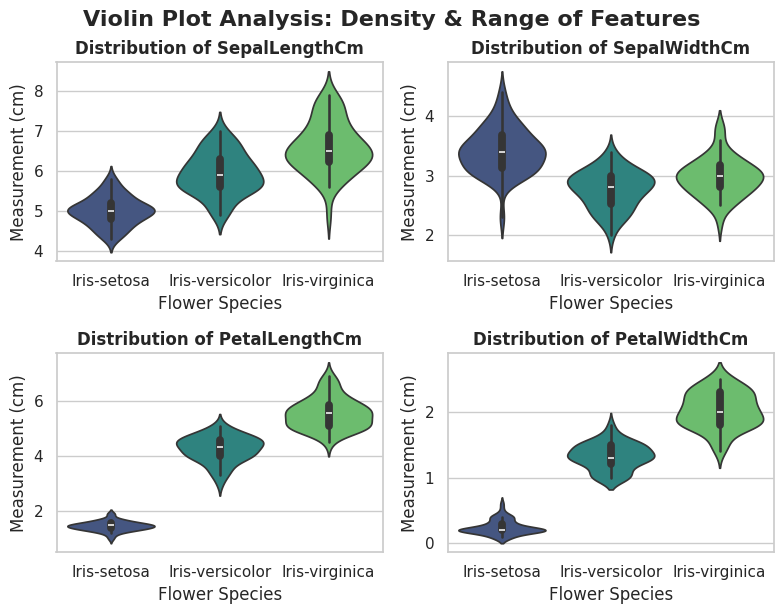

In [ ]:
# 3. Violin Plots - Har feature ki gehrai se analysis
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    # Warning khatam karne ke liye hue='Species' aur legend=False add kiya hai
    sns.violinplot(x='Species', y=col, data=df, hue='Species', palette='viridis', inner='box', legend=False)
    plt.title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    plt.ylabel('Measurement (cm)')
    plt.xlabel('Flower Species')

plt.tight_layout()
plt.suptitle('Violin Plot Analysis: Density & Range of Features', y=1.02, fontsize=16, fontweight='bold')
plt.show()

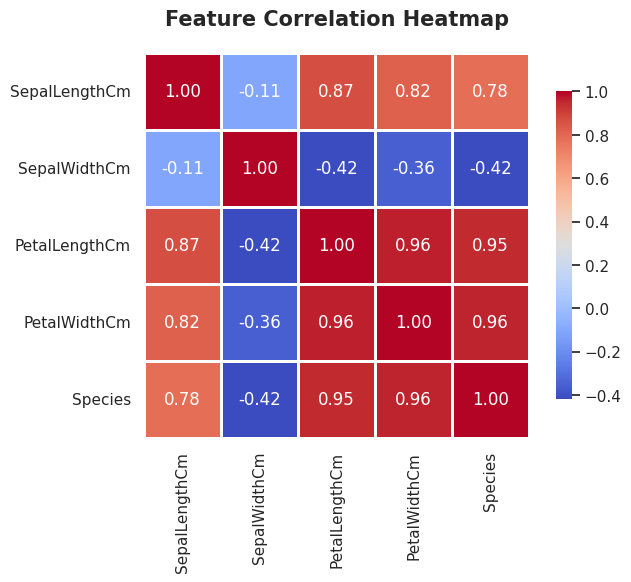

In [ ]:
# Correlation Heatmap - Analyzing relationships between features
plt.figure(figsize=(7, 5))

# Safe method: Sirf numeric columns lena aur 'Id' ko ignore karna agar wo maujood hai
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Id' in numeric_cols:
    numeric_cols.remove('Id')

# Correlation matrix calculate karna
corr_matrix = df[numeric_cols].corr()

# Beautiful Heatmap Plot
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=1,
            square=True,
            cbar_kws={"shrink": .8})

plt.title('Feature Correlation Heatmap', fontsize=15, fontweight='bold', pad=20)
plt.show()

# Data Preprocessing



In [ ]:
#  'Id' column ko remove karna (Professional way)
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)
    print(" The 'Id' column removed.")

#  Species names ko numbers mein convert karna
# Iris-setosa -> 0, Iris-versicolor -> 1, Iris-virginica -> 2
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

print(" The Target labels encoded successfully.")
print("\nFirst 5 rows after cleaning:")
df.head()

 The 'Id' column removed.
 The Target labels encoded successfully.

First 5 rows after cleaning:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Data Splitting (Training vs Testing)

In [ ]:
#  Features (X) aur Target (y) ko define karna
X = df.drop('Species', axis=1) # Input data (Measurements)
y = df['Species']              # Output data (Labels)

# Data Split (80% Training, 20% Testing)
# 'stratify=y' ka matlab hai ke teeno species barabar split hon
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data Splitting Complete!")
print("-" * 30)
print(f"Total Dataset Size:   {len(df)}")
print(f"Training Data (80%):  {len(X_train)}")
print(f"Testing Data (20%):   {len(X_test)}")

Data Splitting Complete!
------------------------------
Total Dataset Size:   150
Training Data (80%):  120
Testing Data (20%):   30


# Model Training - The AI Brain

In [ ]:
# Model initialize karna
model = LogisticRegression(max_iter=200)

# Model ko train karna
model.fit(X_train, y_train)

print(" Model Training Successful!")
print("Hamara AI model ab Iris flowers ko pehchanne ke liye tayyar hai.")

 Model Training Successful!
Hamara AI model ab Iris flowers ko pehchanne ke liye tayyar hai.


# Final Evaluation & Grand Report

 Final Model Accuracy: 96.67%


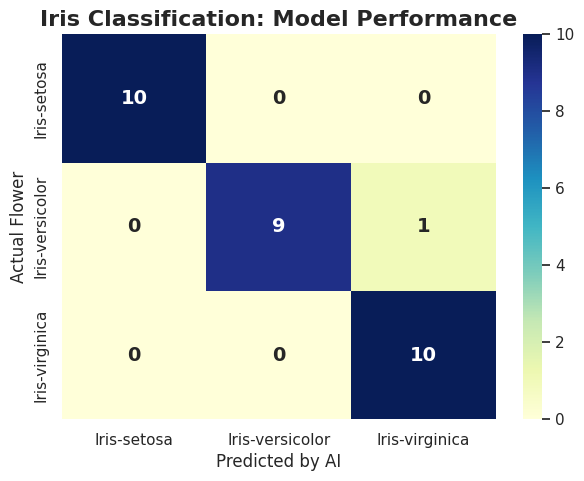


 The Detailed Performance Metrics of model
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
# Prediction on Test Data (20% data jo model ne pehle nahi dekha)
y_pred = model.predict(X_test)

# Accuracy Report
accuracy = accuracy_score(y_test, y_pred)
print(f" Final Model Accuracy: {accuracy * 100:.2f}%")


# Professional Confusion Matrix
plt.figure(figsize=(7, 5))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_,
            annot_kws={"size": 14, "weight": "bold"})

plt.title('Iris Classification: Model Performance', fontsize=16, fontweight='bold')
plt.xlabel('Predicted by AI', fontsize=12)
plt.ylabel('Actual Flower', fontsize=12)
plt.show()


# Final Detailed Stats
print("\n The Detailed Performance Metrics of model")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))